# Number Plate Detection and Replacement with Company Logo
- Overview :
This Python script uses EasyOCR, OpenCV, and NumPy to detect a number plate in a vehicle image and replace it with a company logo. The script processes the input image, detects the number plate, extracts the region, and then overlays the provided logo in place of the number plate.

# Dependencies
# The following libraries are required to run the code:
- EasyOCR: Optical Character Recognition (OCR) library used to detect and extract text from images.
- openCV: Image processing library for handling various image operations such as reading, drawing, resizing, and saving images.
- NumPy: Library used for numerical operations, especially for handling image arrays and manipulating bounding box coordinates.
- Matplotlib: Used for displaying images in a more suitable format for visualization in Jupyter Notebooks or other environments.

In [2]:
#pip install easyocr
#pip install opencv-python
#pip install opencv-python-headless
#pip install numpy
#pip install matplotlib
#pip install easyocr opencv-python numpy matplotlib
#python --version
#pip --version

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


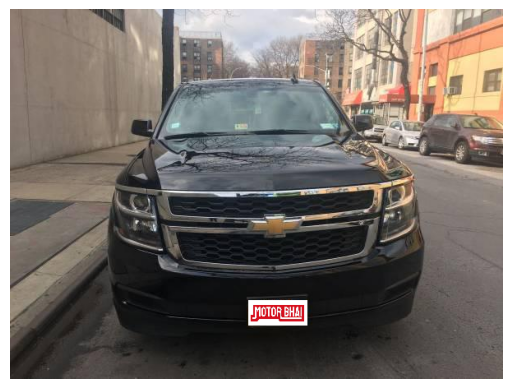

Modified image saved at: output_image.png


In [3]:
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'])  # Initialize the EasyOCR reader

def detect_number_plate(image_path):
    # Read the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect number plate using EasyOCR
    result = reader.readtext(gray)

    # Extract number plate text and draw a rectangle around it
    number_plate_region = None
    number_plate_text = None

    for detection in result:
        points = detection[0]
        text = detection[1]
        
        # Assuming number plate has digits in the text
        if any(char.isdigit() for char in text):
            number_plate_region = points
            number_plate_text = text
            break  # Stop after finding the first detected plate

    return number_plate_region, number_plate_text, image

def replace_plate_with_logo(image_path, logo_path, output_path):
    # Step 1: Detect the number plate in the image
    number_plate_region, number_plate_text, image = detect_number_plate(image_path)

    if number_plate_region is None:
        print("No number plate detected.")
        return

    # Step 2: Load the company logo
    logo = cv2.imread(logo_path, cv2.IMREAD_UNCHANGED)  # Read the logo with alpha channel for transparency
    (logo_height, logo_width) = logo.shape[:2]

    # Step 3: Calculate the bounding box of the number plate region
    # We need the minimum and maximum x and y coordinates to get the rectangle coordinates
    pts = np.array(number_plate_region, dtype=np.int32)
    rect = cv2.boundingRect(pts)
    x, y, w, h = rect  # Get coordinates of the number plate bounding box

    # Step 4: Resize the logo to fit the number plate size
    logo_resized = cv2.resize(logo, (w, h))  # Resize the logo to the same size as the number plate

    # Step 5: Overlay the resized logo onto the image
    # If the logo has an alpha channel (transparency), we need to handle it
    if logo_resized.shape[2] == 4:
        # Split the logo into 3 channels and alpha channel
        logo_rgb = logo_resized[:, :, :3]
        logo_alpha = logo_resized[:, :, 3]
        
        # Resize the number plate region (no transparency)
        plate_region = image[y:y+h, x:x+w]

        # Create a mask using the alpha channel of the logo
        mask = logo_alpha / 255.0  # Normalize alpha to 0-1 range

        # Blend the logo with the number plate region
        for c in range(0, 3):
            plate_region[:, :, c] = plate_region[:, :, c] * (1 - mask) + logo_rgb[:, :, c] * mask

        # Place the logo over the detected number plate region
        image[y:y+h, x:x+w] = plate_region

    else:
        # If no transparency (alpha channel), just replace the number plate region with the logo
        image[y:y+h, x:x+w] = logo_resized

    # Step 6: Save the modified image with the company logo replacing the number plate
    cv2.imwrite(output_path, image)

    # Display the result using matplotlib (for better visualization in a Jupyter environment)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axes
    plt.show()

# Example usage
image_path = 'data18.png'  # Replace with your image file path
logo_path = 'logo.png'  # Replace with your company logo file path
output_path = 'output_image.png'  # Path to save the modified image

replace_plate_with_logo(image_path, logo_path, output_path)
print(f"Modified image saved at: {output_path}")


# Conclusion
- This project successfully demonstrates how to use Optical Character Recognition (OCR) to detect and extract a vehicle's number plate from an image. By leveraging EasyOCR and OpenCV, the script detects the number plate and seamlessly replaces it with a company logo, offering a creative and efficient solution for image manipulation.

- The code showcases the practical application of OCR in real-time vehicle image processing and highlights the flexibility of OpenCV for handling image manipulations like resizing, blending, and saving images. Additionally, the use of EasyOCR ensures that even varied or complex number plates can be detected accurately.

- This solution is particularly useful for applications in automated vehicle identification, branding, and marketing, where you need to replace number plates with customized logos or other elements. The approach is adaptable and can be extended to more complex use cases with additional customization.

By integrating EasyOCR and OpenCV, this project provides a robust foundation for further exploration of image processing and machine learning techniques in real-world applications.